In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List


Matplotlib is building the font cache; this may take a moment.


In [2]:
def euclidean_distance(point1: np.ndarray, point2: np.ndarray) -> float:
    return np.sqrt(np.sum((point1 - point2) ** 2))


In [3]:
# Testing the Euclidean distance function
print(euclidean_distance(np.array([1, 2]), np.array([4, 6])))


5.0


In [4]:
def initialize_centroids(X: np.ndarray, k: int) -> np.ndarray:
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    return X[random_indices]


In [5]:
class KMeans:
    def __init__(self, k: int, max_iters: int = 100, tol: float = 1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None


In [8]:
from sklearn.datasets import make_blobs
X, true_labels = make_blobs(n_samples=300, centers=4, random_state=42)


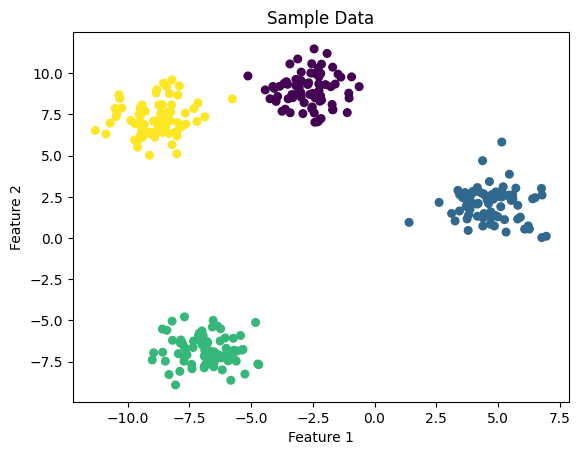

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=true_labels, s=30, cmap='viridis')
plt.title("Sample Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [11]:
def initialize_centroids(X: np.ndarray, k: int) -> np.ndarray:
    """
    Initialize k centroids randomly from the data points.
    
    Args:
        X: Input data of shape (n_samples, n_features)
        k: Number of clusters
        
    Returns:
        np.ndarray: Initial centroids of shape (k, n_features)
    """
    # Randomly select k unique indices from the data points
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[indices]


In [12]:
class KMeans:
    def __init__(self, k: int, max_iters: int = 100, tol: float = 1e-4):
        """
        Initialize KMeans instance.
        
        Args:
            k: Number of clusters
            max_iters: Maximum number of iterations
            tol: Convergence tolerance
        """
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None  # Will store the centroid positions


In [24]:
class KMeans:
    def __init__(self, k: int, max_iters: int = 100, tol: float = 1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None

    def fit(self, X: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        # Step 1: Initializing centroids
        self.centroids = initialize_centroids(X, self.k)
        cluster_assignments = np.zeros(X.shape[0])  # Initialize assignments array

        for i in range(self.max_iters):
            # Step 2: Assigning clusters based on nearest centroid
            cluster_assignments = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in self.centroids]) for x in X])
            
            # Step 3: Update centroids by calculating the mean of points in each cluster
            new_centroids = np.array([X[cluster_assignments == j].mean(axis=0) if len(X[cluster_assignments == j]) > 0 else self.centroids[j] for j in range(self.k)])
            
            # Step 4: Checking for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            
            self.centroids = new_centroids
        
        return cluster_assignments, self.centroids


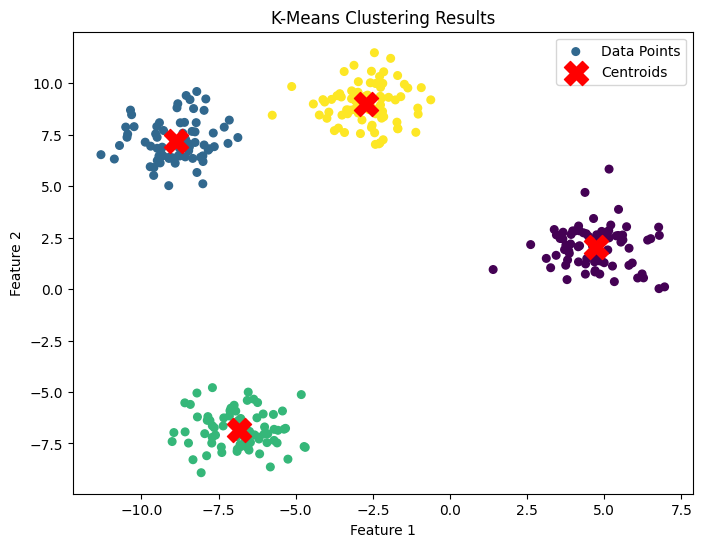

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
X, true_labels = make_blobs(n_samples=300, centers=4, random_state=42)

# Step 2: Instantiate and fit the KMeans model
kmeans = KMeans(k=4, max_iters=100, tol=1e-4)  # Set k to the number of clusters generated by make_blobs
cluster_assignments, centroids = kmeans.fit(X)

# Step 3: Plot the results
plt.figure(figsize=(8, 6))

# Scatter plot of data points with color based on cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, s=30, cmap='viridis', label='Data Points')
# Plot centroids as red 'X'
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


k=2, Inertia=10065.372312100331


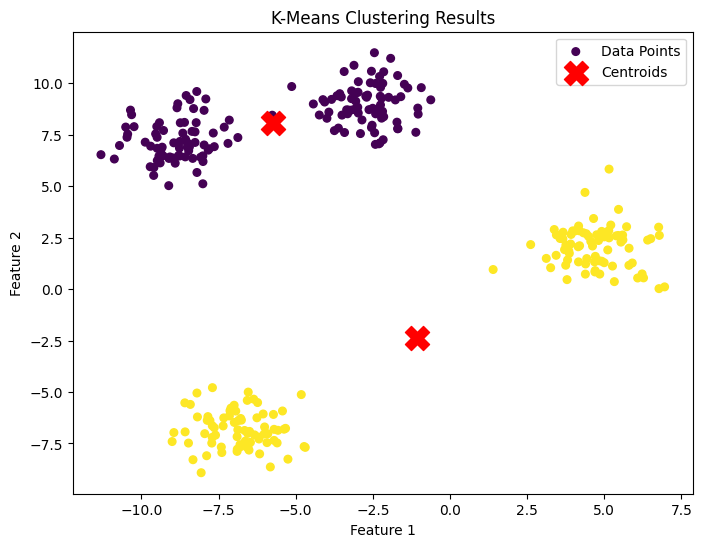

k=3, Inertia=2110.412521895329


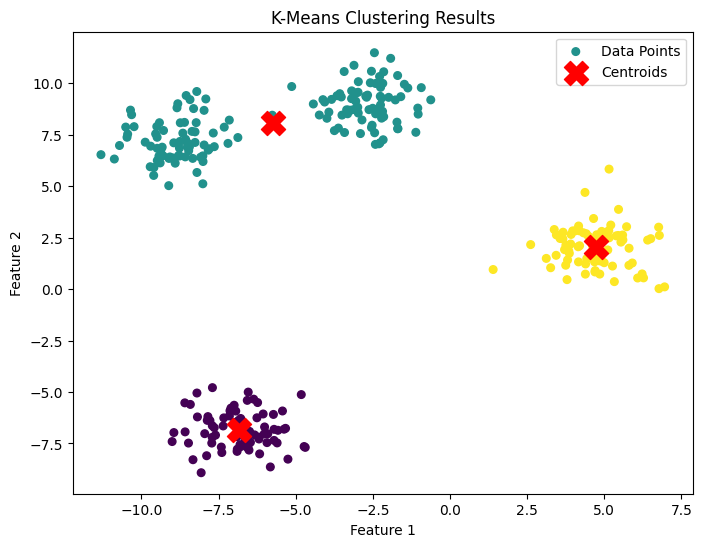

k=4, Inertia=564.9141808210254


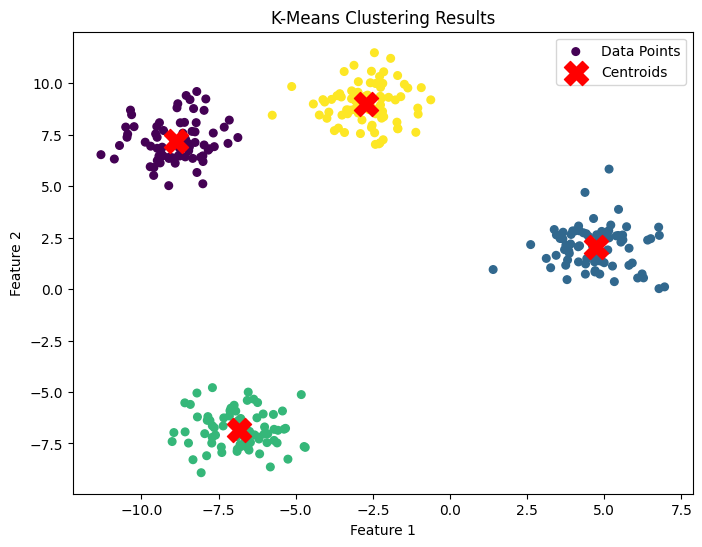

k=5, Inertia=2038.299883947322


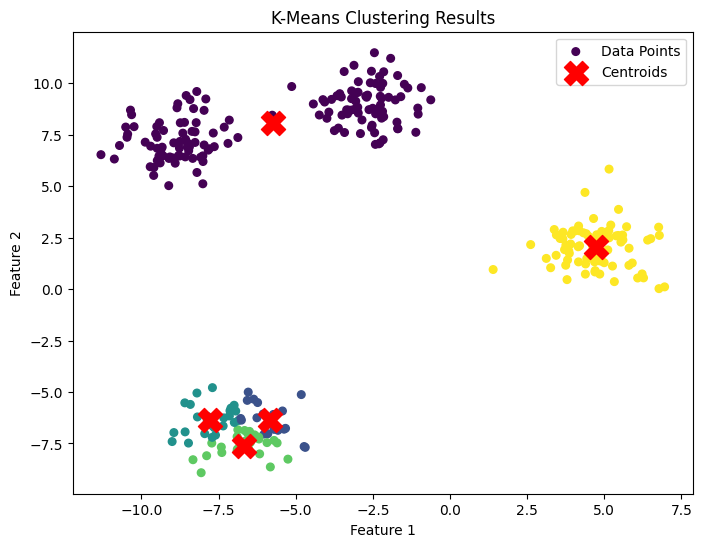

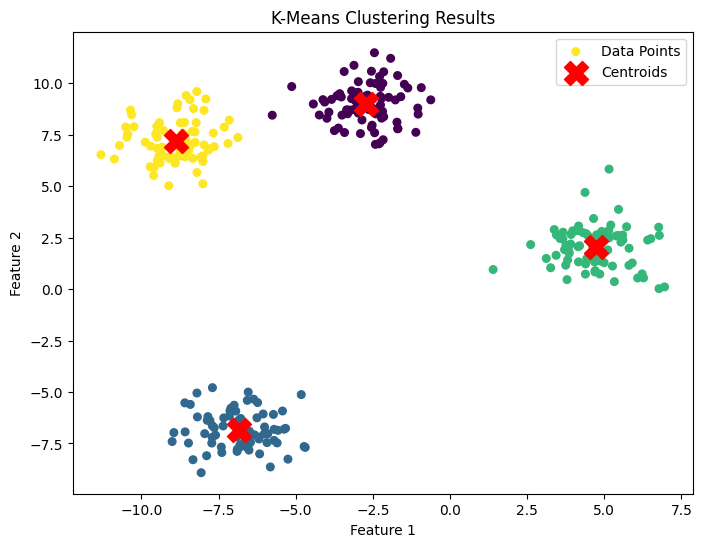

In [29]:
# K-Means Clustering Implementation
import os

## Part 1: Core Implementation
def plot_clusters(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray):
    """
    Visualize the clusters and centroids (implement for 2D data).
    
    Args:
        X: Input data
        labels: Cluster assignments
        centroids: Cluster centroids
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title("K-Means Clustering Results")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

 #Performance Metrics
def calculate_inertia(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray) -> float:
    """
    Calculate the within-cluster sum of squares (inertia).
    
    Args:
        X: Input data
        labels: Cluster assignments
        centroids: Cluster centroids
        
    Returns:
        float: Inertia value
    """
    inertia = 0.0
    for i in range(centroids.shape[0]):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroids[i]) ** 2)
    return inertia

#

## Part 2: Visualization and Analysis
from sklearn.datasets import make_blobs
X, true_labels = make_blobs(n_samples=300, centers=4, random_state=42)

## Part 3: Testing and Validation
k_values = [2, 3, 4, 5]
for k in k_values:
    kmeans = KMeans(k=k)
    cluster_assignments, centroids = kmeans.fit(X)
    inertia = calculate_inertia(X, cluster_assignments, centroids)
    print(f'k={k}, Inertia={inertia}')
    plot_clusters(X, cluster_assignments, centroids)

#Compare with Scikit-Learn’s Implementation:
from sklearn.cluster import KMeans as SklearnKMeans

sklearn_kmeans = SklearnKMeans(n_clusters=4, random_state=42)
sklearn_labels = sklearn_kmeans.fit_predict(X)

# Plot scikit-learn results
plot_clusters(X, sklearn_labels, sklearn_kmeans.cluster_centers_)
